In [18]:
#Regresi adalah variabel independen mengikuti variabel dependen
#Variabel independen berdiri sendiri tidak dipengaruhi variabel lain sedangkan variabel dependen bergantung pada variabel lainnya

In [19]:
#Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [20]:
#Load data
dataset = pd.read_csv("weatherHistory.csv")

In [21]:
dataset.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [22]:
#Feature Selection -> formatted date hanya informasi tambahan jadi dihapus, summary ga perlu, precip type dan daily summary tidak diperlukan informasinya
dataset = dataset.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])

In [23]:
dataset.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [24]:
#Split data target yaitu Humidity dan non target

non_target = dataset.drop(columns='Humidity')
target = dataset['Humidity']

In [25]:
#Splitting data lagi menjadi train, test, dan validation
#rasio 80 10 10
x_train, x_temp, y_train, y_temp = train_test_split(non_target, target, train_size=0.8, random_state=42)
#x_train bakal dapat 80% dari train size = 0.8
#x_temp, y_temp -> test, validation 10 10

x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
#Standarisasi Data
scaler = StandardScaler()

#fungsi ngitung mean dan standar deviasi
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [27]:
#Model Definition

model = Sequential([
    Dense(32, activation="relu", input_dim=x_train.shape[1]), #Input Layer
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="linear"), #Output Layer
])

In [28]:
#Compile Model
#Regresi metriks evaluasi pake MSE(Mean Squared Error) karena hasilnya value
#Klasifikasi metriks evaluasi pake accuracy karena hasilnya berupa kelas/kelompok
model.compile(optimizer="adam", loss="mae", metrics=["mean_squared_error"])

In [29]:
model.summary()
#Params didapat dari jumlah fitur x jumlah neuron + jumlah neuron

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                256       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/100
302/302 [==============================] - 1s 1ms/step - loss: 0.1906 - mean_squared_error: 0.0931 - val_loss: 0.0981 - val_mean_squared_error: 0.0169
Epoch 2/100
302/302 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0164 - val_loss: 0.0933 - val_mean_squared_error: 0.0157
Epoch 3/100
302/302 [==============================] - 0s 980us/step - loss: 0.0924 - mean_squared_error: 0.0154 - val_loss: 0.0908 - val_mean_squared_error: 0.0148
Epoch 4/100
302/302 [==============================] - 0s 1ms/step - loss: 0.0903 - mean_squared_error: 0.0148 - val_loss: 0.0891 - val_mean_squared_error: 0.0143
Epoch 5/100
302/302 [==============================] - 0s 1ms/step - loss: 0.0889 - mean_squared_error: 0.0144 - val_loss: 0.0886 - val_mean_squared_error: 0.0141
Epoch 6/100
302/302 [==============================] - 0s 1ms/step - loss: 0.0878 - mean_squared_error: 0.0141 - val_loss: 0.0881 - val_mean_squared_error: 0.0140
Epoch 7/100
302/302 

In [31]:
loss, mae = model.evaluate(x_test, y_test)
print("Loss",loss)
print("Mean Squared error", mae)

302/302 [==============================] - 0s 701us/step - loss: 0.0787 - mean_squared_error: 0.0121
Loss 0.07868143916130066
Mean Squared error 0.012099700048565865


In [32]:
predict = model.predict(x_test[:5])
actual = y_test[:5]

for predict_value, actual_value in zip(predict, actual):
    print(f"Predicted : {predict_value[0]} | Actual : {actual_value}")

1/1 [==============================] - 0s 55ms/step
Predicted : 0.7747205495834351 | Actual : 0.83
Predicted : 0.8390330076217651 | Actual : 0.67
Predicted : 0.816267728805542 | Actual : 0.68
Predicted : 0.8182823657989502 | Actual : 0.92
Predicted : 0.6814066767692566 | Actual : 0.61


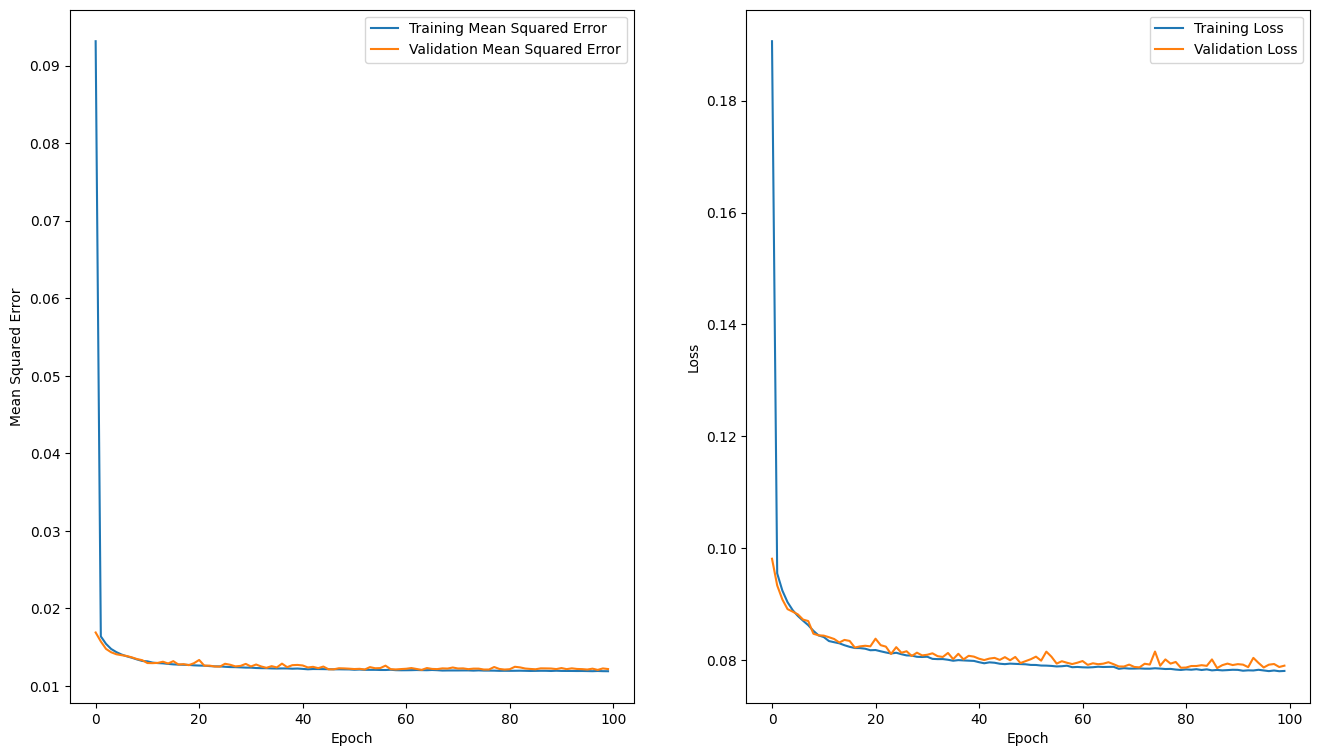

In [33]:
plt.figure(figsize=(16,9))
#Mean Squared Error
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_squared_error'], label="Training Mean Squared Error")
plt.plot(history.history['val_mean_squared_error'], label ="Validation Mean Squared Error")
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label ="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('session2_model.png')
plt.show()

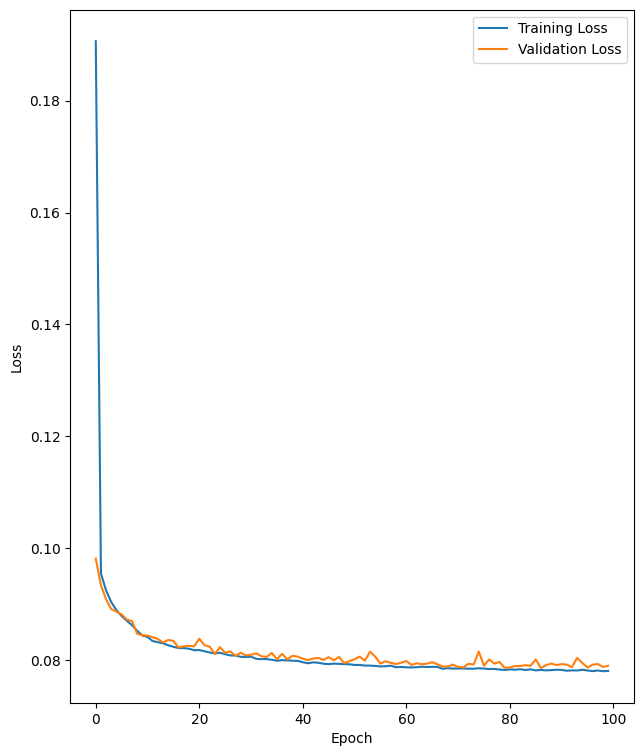

In [34]:
plt.figure(figsize=(16,9))
#loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label ="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('session2_modelLoss.png')
plt.show()